# Bike Cost Prediction using Ridge Regression

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [2]:
bikes = pd.read_excel('Bike_Price_Prediction.xlsx')

## Data Cleaning

In [3]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   S.no                308 non-null    int64  
 1   Bike_company        308 non-null    object 
 2   Bike_model          308 non-null    object 
 3   Manufactured_year   308 non-null    int64  
 4   Engine_warranty     306 non-null    float64
 5   Engine_type         308 non-null    object 
 6   Fuel_type           308 non-null    object 
 7   CC(Cubic capacity)  308 non-null    object 
 8   Fuel_Capacity       307 non-null    object 
 9   Price               308 non-null    int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 24.2+ KB


In [4]:
bikes.head()

,S.no,Bike_company,Bike_model,Manufactured_year,Engine_warranty,Engine_type,Fuel_type,CC(Cubic capacity),Fuel_Capacity,Price
0,1,Bajaj,Avenger 220,2020,5.0,Single,Petrol,220CC,10 Litres,113000
1,2,TVS,Apache RTR,2020,5.0,V-twin,Petrol,120CC,11 Litres,70000
2,3,Hero,Passion,2020,5.0,Boxer,Petrol,140CC,12 Litres,85000
3,4,Honda,Activa 3G,2020,5.0,Single,Petrol,150CC,13 Litres,90000
4,5,Suzuki,Access,2020,5.0,V-twin,Petrol,350CC,14 Litres,65000


In [5]:
missing_values = bikes.isnull().sum()

In [6]:
missing_values

S.no                  0
Bike_company          0
Bike_model            0
Manufactured_year     0
Engine_warranty       2
Engine_type           0
Fuel_type             0
CC(Cubic capacity)    0
Fuel_Capacity         1
Price                 0
dtype: int64

In [7]:
battery_count = bikes[bikes['Fuel_Capacity'] == 'Battery'].shape[0]

print("Number of 'battery' entries in Fuel_Capacity column:", battery_count)

Number of 'battery' entries in Fuel_Capacity column: 40


In [8]:
bikes = bikes.dropna()

In [9]:
bikes = bikes[bikes['Fuel_Capacity'] != 'Battery']

In [10]:
bikes.head(20)

,S.no,Bike_company,Bike_model,Manufactured_year,Engine_warranty,Engine_type,Fuel_type,CC(Cubic capacity),Fuel_Capacity,Price
0,1,Bajaj,Avenger 220,2020,5.0,Single,Petrol,220CC,10 Litres,113000
1,2,TVS,Apache RTR,2020,5.0,V-twin,Petrol,120CC,11 Litres,70000
2,3,Hero,Passion,2020,5.0,Boxer,Petrol,140CC,12 Litres,85000
3,4,Honda,Activa 3G,2020,5.0,Single,Petrol,150CC,13 Litres,90000
4,5,Suzuki,Access,2020,5.0,V-twin,Petrol,350CC,14 Litres,65000
5,6,Royal Enfield,Royal Enfield,2019,5.0,Boxer,Petrol,350CC,15 Litres,180000
6,7,Yamaha,Fascino,2018,5.0,Single,Petrol,150CC,16 Litres,65000
7,8,KTM,KTM RC,2017,5.0,V-twin,Petrol,300CC,17 Litres,150000
8,9,Mahindra,Gusto,2016,5.0,Boxer,Petrol,100CC,18 Litres,89000
9,10,Kawasaki,Ninja,2011,5.0,Single,Petrol,170CC,19 Litres,99999


In [11]:
bikes['CC(Cubic capacity)'] = bikes['CC(Cubic capacity)'].str.replace('CC', '').astype(int)

In [12]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 265 entries, 0 to 307
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   S.no                265 non-null    int64  
 1   Bike_company        265 non-null    object 
 2   Bike_model          265 non-null    object 
 3   Manufactured_year   265 non-null    int64  
 4   Engine_warranty     265 non-null    float64
 5   Engine_type         265 non-null    object 
 6   Fuel_type           265 non-null    object 
 7   CC(Cubic capacity)  265 non-null    int64  
 8   Fuel_Capacity       265 non-null    object 
 9   Price               265 non-null    int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 22.8+ KB


In [13]:
bikes.head()

,S.no,Bike_company,Bike_model,Manufactured_year,Engine_warranty,Engine_type,Fuel_type,CC(Cubic capacity),Fuel_Capacity,Price
0,1,Bajaj,Avenger 220,2020,5.0,Single,Petrol,220,10 Litres,113000
1,2,TVS,Apache RTR,2020,5.0,V-twin,Petrol,120,11 Litres,70000
2,3,Hero,Passion,2020,5.0,Boxer,Petrol,140,12 Litres,85000
3,4,Honda,Activa 3G,2020,5.0,Single,Petrol,150,13 Litres,90000
4,5,Suzuki,Access,2020,5.0,V-twin,Petrol,350,14 Litres,65000


In [14]:
bikes['Fuel_Capacity'] = bikes['Fuel_Capacity'].str.replace(' Litres', '').astype(int)

In [15]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 265 entries, 0 to 307
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   S.no                265 non-null    int64  
 1   Bike_company        265 non-null    object 
 2   Bike_model          265 non-null    object 
 3   Manufactured_year   265 non-null    int64  
 4   Engine_warranty     265 non-null    float64
 5   Engine_type         265 non-null    object 
 6   Fuel_type           265 non-null    object 
 7   CC(Cubic capacity)  265 non-null    int64  
 8   Fuel_Capacity       265 non-null    int64  
 9   Price               265 non-null    int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 22.8+ KB


## Exploratory Data Analysis

In [16]:
bikes.head()

,S.no,Bike_company,Bike_model,Manufactured_year,Engine_warranty,Engine_type,Fuel_type,CC(Cubic capacity),Fuel_Capacity,Price
0,1,Bajaj,Avenger 220,2020,5.0,Single,Petrol,220,10,113000
1,2,TVS,Apache RTR,2020,5.0,V-twin,Petrol,120,11,70000
2,3,Hero,Passion,2020,5.0,Boxer,Petrol,140,12,85000
3,4,Honda,Activa 3G,2020,5.0,Single,Petrol,150,13,90000
4,5,Suzuki,Access,2020,5.0,V-twin,Petrol,350,14,65000


In [17]:
bikes_numeric = bikes.select_dtypes(include=['float', 'int'])
bikes_numeric.head()

,S.no,Manufactured_year,Engine_warranty,CC(Cubic capacity),Fuel_Capacity,Price
0,1,2020,5.0,220,10,113000
1,2,2020,5.0,120,11,70000
2,3,2020,5.0,140,12,85000
3,4,2020,5.0,150,13,90000
4,5,2020,5.0,350,14,65000


In [18]:
bikes_numeric = bikes_numeric.drop(['S.no'], axis=1)
bikes_numeric.head()

,Manufactured_year,Engine_warranty,CC(Cubic capacity),Fuel_Capacity,Price
0,2020,5.0,220,10,113000
1,2020,5.0,120,11,70000
2,2020,5.0,140,12,85000
3,2020,5.0,150,13,90000
4,2020,5.0,350,14,65000


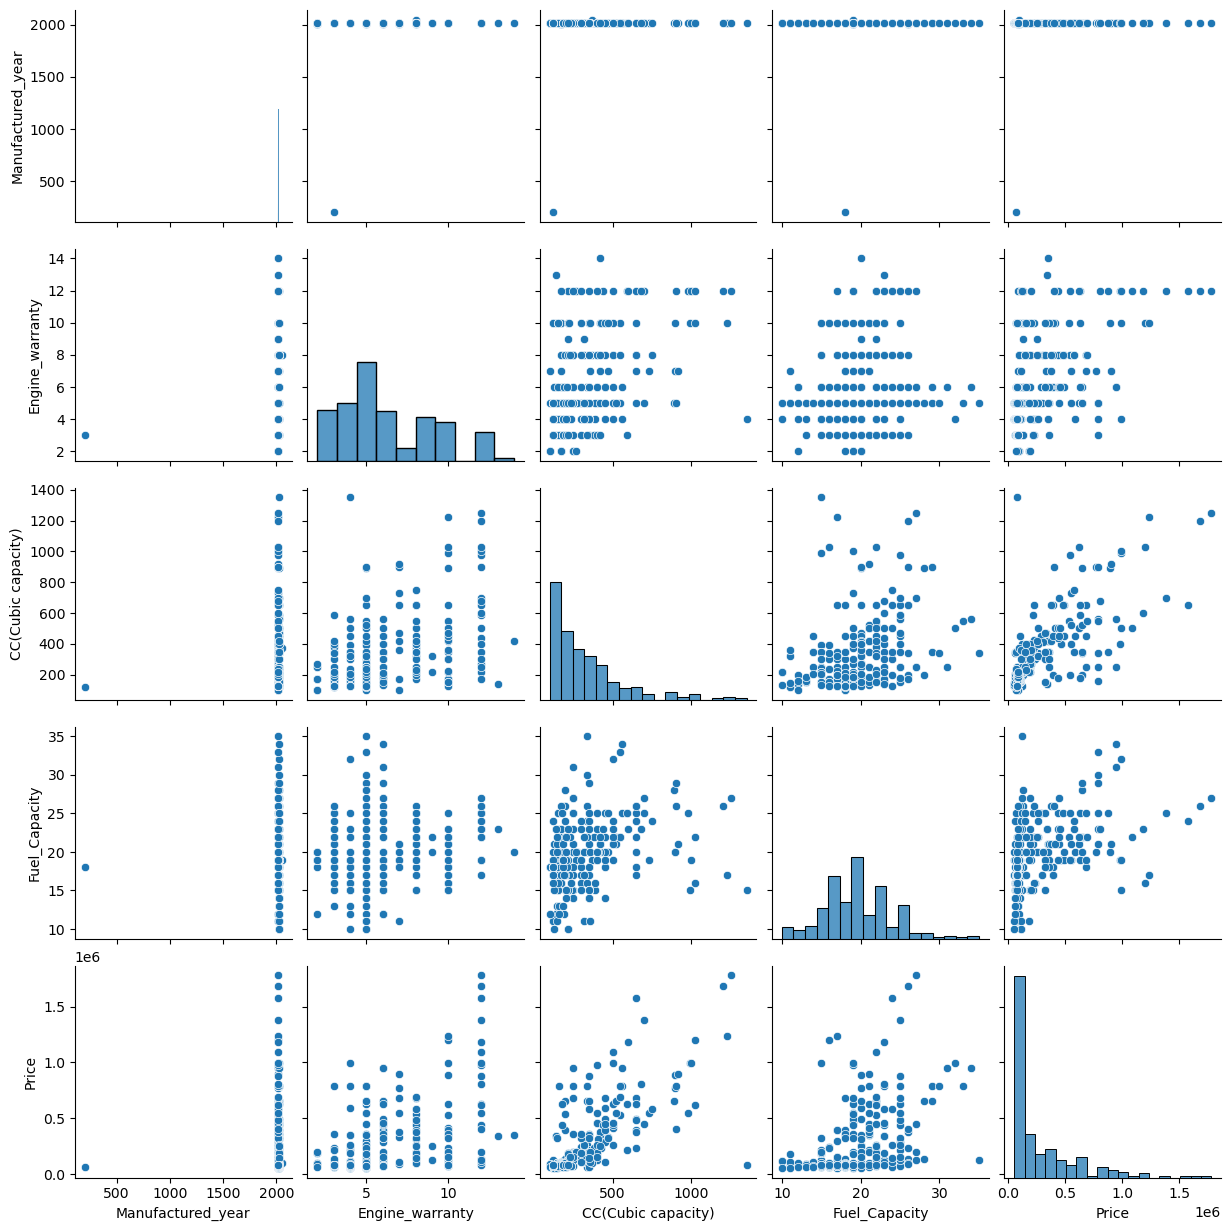

In [19]:
sns.pairplot(bikes_numeric)
plt.show()

In [20]:
cor = bikes_numeric.corr()
cor

,Manufactured_year,Engine_warranty,CC(Cubic capacity),Fuel_Capacity,Price
Manufactured_year,1.000000,0.071998,0.056548,0.020024,0.043245
Engine_warranty,0.071998,1.000000,0.423676,0.205454,0.466071
CC(Cubic capacity),0.056548,0.423676,1.000000,0.340637,0.732666
Fuel_Capacity,0.020024,0.205454,0.340637,1.000000,0.443078
Price,0.043245,0.466071,0.732666,0.443078,1.000000


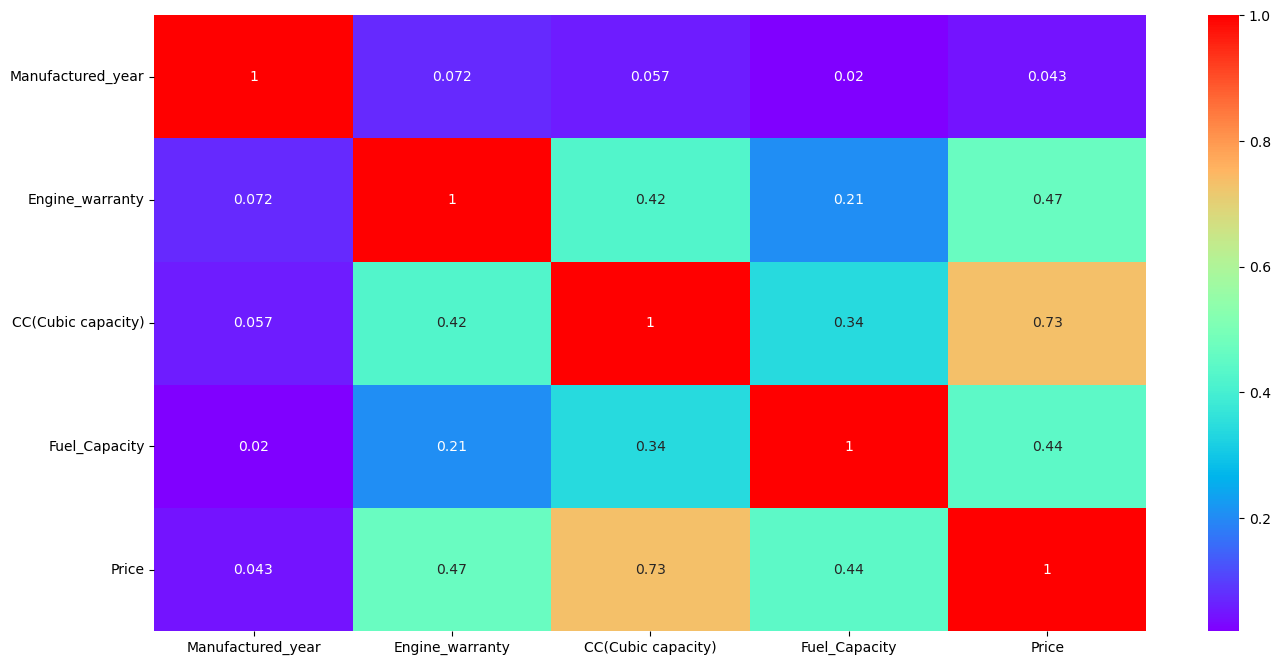

In [21]:
plt.figure(figsize=(16,8))

# heatmap
sns.heatmap(cor, cmap="rainbow", annot=True)
plt.show()

## Data Prepartion

In [22]:
X = bikes.loc[:, ['Bike_company','Bike_model','Manufactured_year','Engine_warranty','Engine_type','Fuel_type','CC(Cubic capacity)','Fuel_Capacity']]

y = bikes['Price']

In [23]:
bikes_categorical = X.select_dtypes(include=['object'])
bikes_categorical.head()

,Bike_company,Bike_model,Engine_type,Fuel_type
0,Bajaj,Avenger 220,Single,Petrol
1,TVS,Apache RTR,V-twin,Petrol
2,Hero,Passion,Boxer,Petrol
3,Honda,Activa 3G,Single,Petrol
4,Suzuki,Access,V-twin,Petrol


In [24]:
bikes_dummies = pd.get_dummies(bikes_categorical, drop_first=True)
bikes_dummies.head()

,Bike_company_BMW,Bike_company_Bajaj,Bike_company_Banelli,Bike_company_Bgauss,Bike_company_CFMoto,Bike_company_Ducati,Bike_company_Harley Davidson,Bike_company_Hero,Bike_company_Honda,Bike_company_Jawa,Bike_company_KTM,Bike_company_Kawasaki,Bike_company_Mahindra,Bike_company_Okinawa,Bike_company_Revolt Motors,Bike_company_Royal Enfield,Bike_company_Suzuki,Bike_company_TVS,Bike_company_Triumph,Bike_company_Yamaha,Bike_model_220 F,Bike_model_310 BR,Bike_model_310 GS,Bike_model_310 GSTR,Bike_model_Aboarder,Bike_model_Access,Bike_model_Access ATR,Bike_model_Access LR,Bike_model_Activa 3G,Bike_model_Activa 4G,Bike_model_Activa 5G,Bike_model_Adventure,Bike_model_Apache RTR,Bike_model_Apache XTR,Bike_model_Aprilia,Bike_model_Apriori,Bike_model_Avenger 150,Bike_model_Avenger 220,Bike_model_Benzo,Bike_model_Bgauss A1,Bike_model_Bgauss B8,Bike_model_Bgauss Flash,Bike_model_Bgauss Hash,Bike_model_Bgauss Prior,Bike_model_Bgauss Radiator,Bike_model_Bgauss Razor,Bike_model_Bgauss UM,Bike_model_Bright,Bike_model_Bullet,Bike_model_CFMoto 200SR,Bike_model_CFMoto 250SR,Bike_model_CFMoto 350NK,Bike_model_CFMoto 350ZR,Bike_model_CFMoto 450NR,Bike_model_CFMoto 550NTR,Bike_model_CFMoto 650MT,Bike_model_CFMoto 650N,Bike_model_CFMoto 650NZ,Bike_model_CFMoto 750ZTR,Bike_model_CT 100,Bike_model_Classic,Bike_model_Cruise,Bike_model_Cruise 220,Bike_model_DDR,Bike_model_Davidson Iron,Bike_model_Davidson IronFist,Bike_model_Davidson Romeo,Bike_model_Davidson Street,Bike_model_Delux,Bike_model_Destini,Bike_model_Dominar,Bike_model_Dragon,Bike_model_Duke,Bike_model_Duke 125,Bike_model_Duke 300,Bike_model_Duke 360T,Bike_model_Duke 390,Bike_model_Duke DAM,Bike_model_Duster,Bike_model_F 900 R,Bike_model_F 990 XR,Bike_model_FDR,Bike_model_FZ-S,Bike_model_FZ-S-400,Bike_model_FZ-SR,Bike_model_Fascino,Bike_model_Fascino STR,Bike_model_Fascino XS,Bike_model_Fat boy,Bike_model_Ferori,Bike_model_Fiesta,Bike_model_Flow,Bike_model_Flutter,Bike_model_Forty Eight,Bike_model_G 310 R,Bike_model_G 310 S,Bike_model_G 320 X,Bike_model_G 410 R,Bike_model_G 900,Bike_model_GS 990,Bike_model_Gangster,Bike_model_Gixer,Bike_model_Gixer RC,Bike_model_Glamour,Bike_model_Gusto,Bike_model_Gusto GS,Bike_model_Gutter,Bike_model_Hayabusa,Bike_model_Hornet,Bike_model_Hsness,Bike_model_Imperiale,Bike_model_Intruder,Bike_model_Jawa 42,Bike_model_Jawa HTC,Bike_model_Jawa Milo,Bike_model_Jawa Perek,Bike_model_Jawa Style,Bike_model_Jawa Xylo,Bike_model_Jawa Zeppelin,Bike_model_Jojo,Bike_model_Jupiter,Bike_model_KTM RC,Bike_model_KTM RC 350,Bike_model_KTM RCX,Bike_model_Kite,Bike_model_Leoncino,Bike_model_Leoncino CAP,Bike_model_Leoncino LLI,Bike_model_Like 200,Bike_model_Like EV,Bike_model_Limperiale,Bike_model_Limperiale BB,Bike_model_Limperiale Blue,Bike_model_Lite,Bike_model_Livo,Bike_model_Low Rider,Bike_model_Low Rider S,Bike_model_MTR,Bike_model_Maza,Bike_model_Mojo,Bike_model_Mojo CM,Bike_model_Mojo MAZ,Bike_model_Mono,Bike_model_Monster,Bike_model_MultiStrada,Bike_model_N Max,Bike_model_NS 200,Bike_model_NTR,Bike_model_Ninja,Bike_model_Ninja Kaboom,Bike_model_Ninja Pro,Bike_model_Panigale,Bike_model_Panigale ZR,Bike_model_Panigale ZR-450,Bike_model_Passion,Bike_model_Passion Pro,Bike_model_Pleasure,Bike_model_Pluto,Bike_model_Praise,Bike_model_Praise I,Bike_model_Praise Pro,Bike_model_Pulsar,Bike_model_Pulsar NS,Bike_model_Pulse,Bike_model_RTR,Bike_model_Raise,Bike_model_Revolt RV Café Racer,Bike_model_Revolt RV150,Bike_model_Revolt RV180,Bike_model_Revolt RV200,Bike_model_Revolt RV250,Bike_model_Revolt RV300,Bike_model_Revolt RV400,Bike_model_Revolt RV450,Bike_model_Ridge,Bike_model_RoadStrapper,Bike_model_Roadstar,Bike_model_Royal Enfield,Bike_model_SDR,Bike_model_Scrambler,Bike_model_Scrambler DU,Bike_model_Scrambler ZD,Bike_model_Shine,Bike_model_Shine XR,Bike_model_Shutter,Bike_model_Splendor,Bike_model_StreetFighter,Bike_model_Svartpilen,Bike_model_TRK 502,Bike_model_TRK 550,Bike_model_Thunder,Bike_model_Triumph Avenue,Bike_model_Triumph Bournville,Bike_model_Triumph Crusher,Bike_m

In [25]:
X = X.drop(list(bikes_categorical.columns), axis=1)

In [26]:
X = pd.concat([X, bikes_dummies], axis=1)

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[['Manufactured_year','Engine_warranty','CC(Cubic capacity)','Fuel_Capacity']]=scaler.fit_transform(X_train[['Manufactured_year','Engine_warranty','CC(Cubic capacity)','Fuel_Capacity']])
X_train.head()

,Manufactured_year,Engine_warranty,CC(Cubic capacity),Fuel_Capacity,Bike_company_BMW,Bike_company_Bajaj,Bike_company_Banelli,Bike_company_Bgauss,Bike_company_CFMoto,Bike_company_Ducati,Bike_company_Harley Davidson,Bike_company_Hero,Bike_company_Honda,Bike_company_Jawa,Bike_company_KTM,Bike_company_Kawasaki,Bike_company_Mahindra,Bike_company_Okinawa,Bike_company_Revolt Motors,Bike_company_Royal Enfield,Bike_company_Suzuki,Bike_company_TVS,Bike_company_Triumph,Bike_company_Yamaha,Bike_model_220 F,Bike_model_310 BR,Bike_model_310 GS,Bike_model_310 GSTR,Bike_model_Aboarder,Bike_model_Access,Bike_model_Access ATR,Bike_model_Access LR,Bike_model_Activa 3G,Bike_model_Activa 4G,Bike_model_Activa 5G,Bike_model_Adventure,Bike_model_Apache RTR,Bike_model_Apache XTR,Bike_model_Aprilia,Bike_model_Apriori,Bike_model_Avenger 150,Bike_model_Avenger 220,Bike_model_Benzo,Bike_model_Bgauss A1,Bike_model_Bgauss B8,Bike_model_Bgauss Flash,Bike_model_Bgauss Hash,Bike_model_Bgauss Prior,Bike_model_Bgauss Radiator,Bike_model_Bgauss Razor,Bike_model_Bgauss UM,Bike_model_Bright,Bike_model_Bullet,Bike_model_CFMoto 200SR,Bike_model_CFMoto 250SR,Bike_model_CFMoto 350NK,Bike_model_CFMoto 350ZR,Bike_model_CFMoto 450NR,Bike_model_CFMoto 550NTR,Bike_model_CFMoto 650MT,Bike_model_CFMoto 650N,Bike_model_CFMoto 650NZ,Bike_model_CFMoto 750ZTR,Bike_model_CT 100,Bike_model_Classic,Bike_model_Cruise,Bike_model_Cruise 220,Bike_model_DDR,Bike_model_Davidson Iron,Bike_model_Davidson IronFist,Bike_model_Davidson Romeo,Bike_model_Davidson Street,Bike_model_Delux,Bike_model_Destini,Bike_model_Dominar,Bike_model_Dragon,Bike_model_Duke,Bike_model_Duke 125,Bike_model_Duke 300,Bike_model_Duke 360T,Bike_model_Duke 390,Bike_model_Duke DAM,Bike_model_Duster,Bike_model_F 900 R,Bike_model_F 990 XR,Bike_model_FDR,Bike_model_FZ-S,Bike_model_FZ-S-400,Bike_model_FZ-SR,Bike_model_Fascino,Bike_model_Fascino STR,Bike_model_Fascino XS,Bike_model_Fat boy,Bike_model_Ferori,Bike_model_Fiesta,Bike_model_Flow,Bike_model_Flutter,Bike_model_Forty Eight,Bike_model_G 310 R,Bike_model_G 310 S,Bike_model_G 320 X,Bike_model_G 410 R,Bike_model_G 900,Bike_model_GS 990,Bike_model_Gangster,Bike_model_Gixer,Bike_model_Gixer RC,Bike_model_Glamour,Bike_model_Gusto,Bike_model_Gusto GS,Bike_model_Gutter,Bike_model_Hayabusa,Bike_model_Hornet,Bike_model_Hsness,Bike_model_Imperiale,Bike_model_Intruder,Bike_model_Jawa 42,Bike_model_Jawa HTC,Bike_model_Jawa Milo,Bike_model_Jawa Perek,Bike_model_Jawa Style,Bike_model_Jawa Xylo,Bike_model_Jawa Zeppelin,Bike_model_Jojo,Bike_model_Jupiter,Bike_model_KTM RC,Bike_model_KTM RC 350,Bike_model_KTM RCX,Bike_model_Kite,Bike_model_Leoncino,Bike_model_Leoncino CAP,Bike_model_Leoncino LLI,Bike_model_Like 200,Bike_model_Like EV,Bike_model_Limperiale,Bike_model_Limperiale BB,Bike_model_Limperiale Blue,Bike_model_Lite,Bike_model_Livo,Bike_model_Low Rider,Bike_model_Low Rider S,Bike_model_MTR,Bike_model_Maza,Bike_model_Mojo,Bike_model_Mojo CM,Bike_model_Mojo MAZ,Bike_model_Mono,Bike_model_Monster,Bike_model_MultiStrada,Bike_model_N Max,Bike_model_NS 200,Bike_model_NTR,Bike_model_Ninja,Bike_model_Ninja Kaboom,Bike_model_Ninja Pro,Bike_model_Panigale,Bike_model_Panigale ZR,Bike_model_Panigale ZR-450,Bike_model_Passion,Bike_model_Passion Pro,Bike_model_Pleasure,Bike_model_Pluto,Bike_model_Praise,Bike_model_Praise I,Bike_model_Praise Pro,Bike_model_Pulsar,Bike_model_Pulsar NS,Bike_model_Pulse,Bike_model_RTR,Bike_model_Raise,Bike_model_Revolt RV Café Racer,Bike_model_Revolt RV150,Bike_model_Revolt RV180,Bike_model_Revolt RV200,Bike_model_Revolt RV250,Bike_model_Revolt RV300,Bike_model_Revolt RV400,Bike_model_Revolt RV450,Bike_model_Ridge,Bike_model_RoadStrapper,Bike_model_Roadstar,Bike_model_Royal Enfield,Bike_model_SDR,Bike_model_Scrambler,Bike_model_Scrambler DU,Bike_model_Scrambler ZD,Bike_model_Shine,Bike_model_Shine XR,Bike_model_Shutter,Bike_model_Splendor,Bike_model_StreetFighter,Bike_model_Svartpilen,Bike_model_TRK 502,Bike_model_TRK 550,Bike_model_Thunder,Bike_model_Triumph Ave

In [29]:
X_test[['Manufactured_year','Engine_warranty','CC(Cubic capacity)','Fuel_Capacity']]=scaler.transform(X_test[['Manufactured_year','Engine_warranty','CC(Cubic capacity)','Fuel_Capacity']])
X_test.head()

,Manufactured_year,Engine_warranty,CC(Cubic capacity),Fuel_Capacity,Bike_company_BMW,Bike_company_Bajaj,Bike_company_Banelli,Bike_company_Bgauss,Bike_company_CFMoto,Bike_company_Ducati,Bike_company_Harley Davidson,Bike_company_Hero,Bike_company_Honda,Bike_company_Jawa,Bike_company_KTM,Bike_company_Kawasaki,Bike_company_Mahindra,Bike_company_Okinawa,Bike_company_Revolt Motors,Bike_company_Royal Enfield,Bike_company_Suzuki,Bike_company_TVS,Bike_company_Triumph,Bike_company_Yamaha,Bike_model_220 F,Bike_model_310 BR,Bike_model_310 GS,Bike_model_310 GSTR,Bike_model_Aboarder,Bike_model_Access,Bike_model_Access ATR,Bike_model_Access LR,Bike_model_Activa 3G,Bike_model_Activa 4G,Bike_model_Activa 5G,Bike_model_Adventure,Bike_model_Apache RTR,Bike_model_Apache XTR,Bike_model_Aprilia,Bike_model_Apriori,Bike_model_Avenger 150,Bike_model_Avenger 220,Bike_model_Benzo,Bike_model_Bgauss A1,Bike_model_Bgauss B8,Bike_model_Bgauss Flash,Bike_model_Bgauss Hash,Bike_model_Bgauss Prior,Bike_model_Bgauss Radiator,Bike_model_Bgauss Razor,Bike_model_Bgauss UM,Bike_model_Bright,Bike_model_Bullet,Bike_model_CFMoto 200SR,Bike_model_CFMoto 250SR,Bike_model_CFMoto 350NK,Bike_model_CFMoto 350ZR,Bike_model_CFMoto 450NR,Bike_model_CFMoto 550NTR,Bike_model_CFMoto 650MT,Bike_model_CFMoto 650N,Bike_model_CFMoto 650NZ,Bike_model_CFMoto 750ZTR,Bike_model_CT 100,Bike_model_Classic,Bike_model_Cruise,Bike_model_Cruise 220,Bike_model_DDR,Bike_model_Davidson Iron,Bike_model_Davidson IronFist,Bike_model_Davidson Romeo,Bike_model_Davidson Street,Bike_model_Delux,Bike_model_Destini,Bike_model_Dominar,Bike_model_Dragon,Bike_model_Duke,Bike_model_Duke 125,Bike_model_Duke 300,Bike_model_Duke 360T,Bike_model_Duke 390,Bike_model_Duke DAM,Bike_model_Duster,Bike_model_F 900 R,Bike_model_F 990 XR,Bike_model_FDR,Bike_model_FZ-S,Bike_model_FZ-S-400,Bike_model_FZ-SR,Bike_model_Fascino,Bike_model_Fascino STR,Bike_model_Fascino XS,Bike_model_Fat boy,Bike_model_Ferori,Bike_model_Fiesta,Bike_model_Flow,Bike_model_Flutter,Bike_model_Forty Eight,Bike_model_G 310 R,Bike_model_G 310 S,Bike_model_G 320 X,Bike_model_G 410 R,Bike_model_G 900,Bike_model_GS 990,Bike_model_Gangster,Bike_model_Gixer,Bike_model_Gixer RC,Bike_model_Glamour,Bike_model_Gusto,Bike_model_Gusto GS,Bike_model_Gutter,Bike_model_Hayabusa,Bike_model_Hornet,Bike_model_Hsness,Bike_model_Imperiale,Bike_model_Intruder,Bike_model_Jawa 42,Bike_model_Jawa HTC,Bike_model_Jawa Milo,Bike_model_Jawa Perek,Bike_model_Jawa Style,Bike_model_Jawa Xylo,Bike_model_Jawa Zeppelin,Bike_model_Jojo,Bike_model_Jupiter,Bike_model_KTM RC,Bike_model_KTM RC 350,Bike_model_KTM RCX,Bike_model_Kite,Bike_model_Leoncino,Bike_model_Leoncino CAP,Bike_model_Leoncino LLI,Bike_model_Like 200,Bike_model_Like EV,Bike_model_Limperiale,Bike_model_Limperiale BB,Bike_model_Limperiale Blue,Bike_model_Lite,Bike_model_Livo,Bike_model_Low Rider,Bike_model_Low Rider S,Bike_model_MTR,Bike_model_Maza,Bike_model_Mojo,Bike_model_Mojo CM,Bike_model_Mojo MAZ,Bike_model_Mono,Bike_model_Monster,Bike_model_MultiStrada,Bike_model_N Max,Bike_model_NS 200,Bike_model_NTR,Bike_model_Ninja,Bike_model_Ninja Kaboom,Bike_model_Ninja Pro,Bike_model_Panigale,Bike_model_Panigale ZR,Bike_model_Panigale ZR-450,Bike_model_Passion,Bike_model_Passion Pro,Bike_model_Pleasure,Bike_model_Pluto,Bike_model_Praise,Bike_model_Praise I,Bike_model_Praise Pro,Bike_model_Pulsar,Bike_model_Pulsar NS,Bike_model_Pulse,Bike_model_RTR,Bike_model_Raise,Bike_model_Revolt RV Café Racer,Bike_model_Revolt RV150,Bike_model_Revolt RV180,Bike_model_Revolt RV200,Bike_model_Revolt RV250,Bike_model_Revolt RV300,Bike_model_Revolt RV400,Bike_model_Revolt RV450,Bike_model_Ridge,Bike_model_RoadStrapper,Bike_model_Roadstar,Bike_model_Royal Enfield,Bike_model_SDR,Bike_model_Scrambler,Bike_model_Scrambler DU,Bike_model_Scrambler ZD,Bike_model_Shine,Bike_model_Shine XR,Bike_model_Shutter,Bike_model_Splendor,Bike_model_StreetFighter,Bike_model_Svartpilen,Bike_model_TRK 502,Bike_model_TRK 550,Bike_model_Thunder,Bike_model_Triumph Ave

## Model Building

In [30]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [31]:
cv_results = pd.DataFrame(model_cv.cv_results_)

cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.009372,0.008728,0.003530,0.001526,0.0001,{'alpha': 0.0001},-138340.646931,-111221.805102,-222946.471212,-207817.767599,-136151.660370,-163295.670243,43844.436592,26,-1189.276554,-1201.294530,-1354.003765,-535.583982,-1014.125230,-1058.856812,282.922218
1,0.003631,0.000191,0.002444,0.000206,0.001,{'alpha': 0.001},-137700.649319,-105127.248100,-221209.820300,-150285.210658,-135898.053793,-150044.196434,38560.635012,25,-1394.236413,-1512.407091,-1539.919683,-762.294424,-1242.748914,-1290.321305,284.075805
2,0.003791,0.000277,0.002487,0.000253,0.01,{'alpha': 0.01},-135493.859990,-101716.512983,-211110.500245,-160988.436401,-134983.718980,-148858.605720,36375.642901,24,-3671.580860,-3092.794998,-3386.904224,-2868.744905,-3605.216278,-3325.048253,304.814517
3,0.003822,0.000443,0.002347,0.000072,0.05,{'alpha': 0.05},-131970.526620,-104147.277162,-195975.252730,-127741.240303,-131098.560419,-138186.571447,30646.987768,22,-11056.232242,-8090.325508,-9615.728908,-9057.473623,-11182.389803,-9800.430017,1182.996890
4,0.004692,0.000921,0.002696,0.000268,0.1,{'alpha': 0.1},-129948.379176,-107121.866447,-185814.749888,-112419.182356,-127370.925835,-132535.020740,28009.153839,20,-16942.839602,-12888.786909,-15124.419606,-14701.626094,-17358.106102,-15403.155663,1617.673985


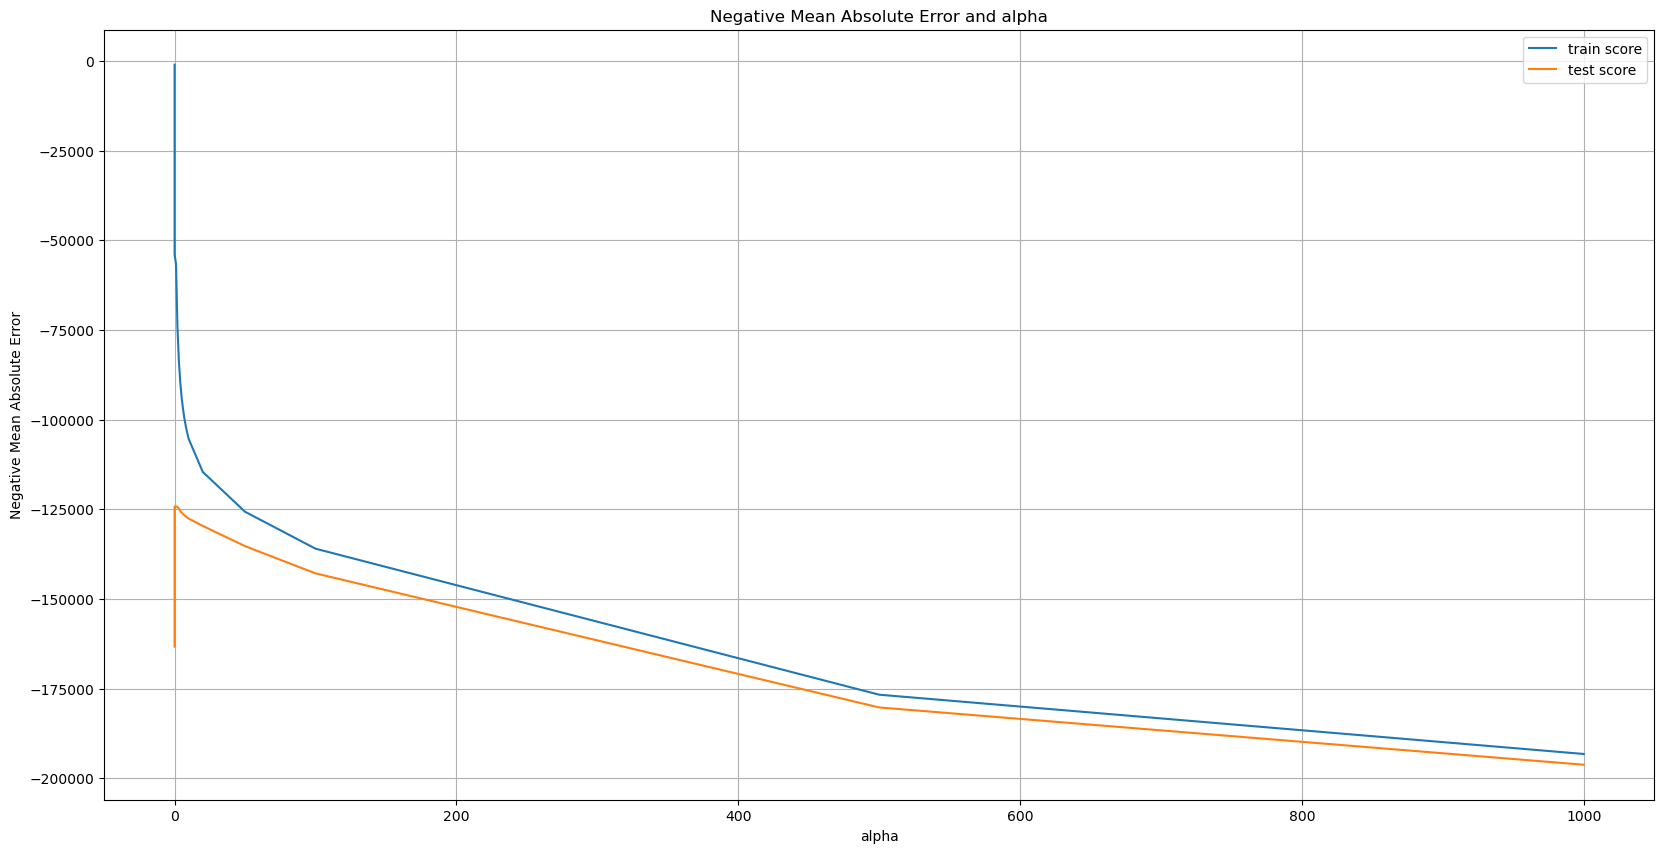

In [32]:
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int')

# plotting
plt.figure(figsize=(20,10))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.grid()
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [33]:
cv_results = cv_results[cv_results['param_alpha']<=200]

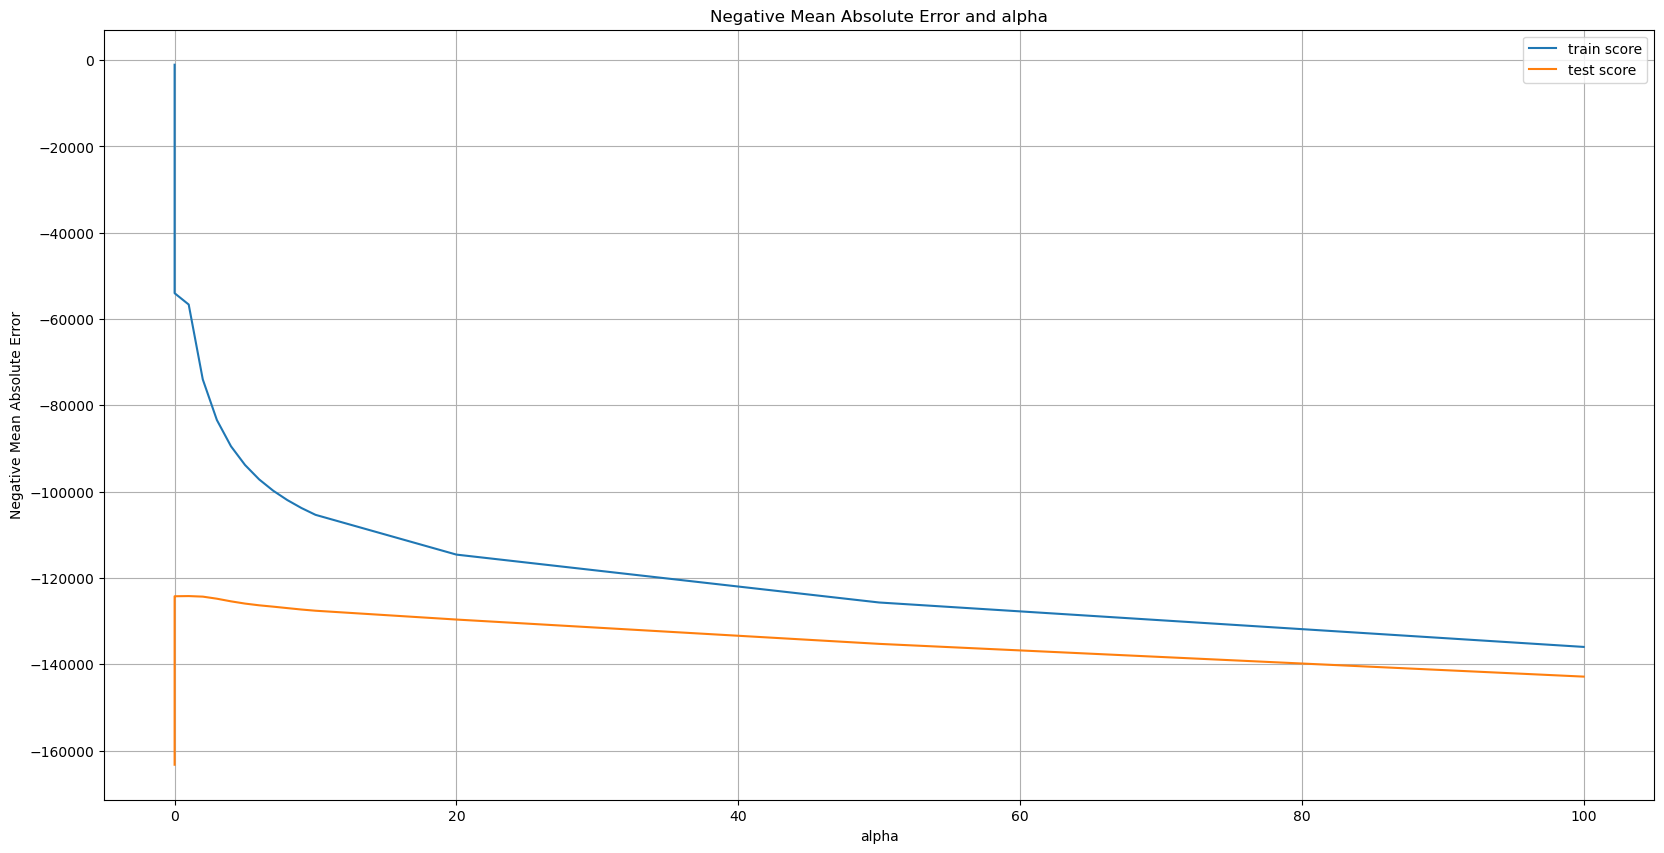

In [34]:
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int')

# plotting
plt.figure(figsize=(20,10))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.grid()
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [35]:
alpha = 20
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([ 1.47886487e+03,  3.39882636e+04,  1.48494381e+05,  6.41812110e+04,
        1.36282213e+04,  2.29804967e+04,  1.70733117e+04, -1.51633718e+04,
        8.71997670e+03, -2.29300700e+04,  2.24969362e+04, -1.09974040e+04,
       -3.89675855e+04, -1.49570752e+04, -2.46667533e+04,  1.95605936e+04,
       -1.14970766e+04, -1.88646205e+04,  2.48011362e+04, -1.53656286e+04,
        1.25414516e+04,  1.10993066e+03,  3.91813612e+04, -6.87304771e+03,
       -9.65967830e+03, -9.87846804e+03, -4.16134945e+03, -3.92561477e+03,
       -1.92075581e+03, -1.23323058e+04, -2.95085805e+03, -7.54012893e+03,
        1.00992962e+04, -3.26641389e+04,  0.00000000e+00,  0.00000000e+00,
        6.66465298e+03,  2.47369522e+03, -8.05813444e+02, -3.39629650e+03,
       -2.46582867e+03,  2.68255088e+03,  4.05565721e+02, -4.62649035e+02,
        0.00000000e+00,  0.00000000e+00, -6.53176964e+03,  0.00000000e+00,
       -4.15404416e+03, -4.19438903e+03,  1.79480067e+02, -3.44341371e+03,
       -4.50763675e+03,  

In [36]:
imp_ridge = pd.DataFrame({
    "Varname": X_train.columns,
    "Coefficient": ridge.coef_})
imp_ridge.sort_values(by="Coefficient", ascending=False)

,Varname,Coefficient
2,CC(Cubic capacity),148494.380958
3,Fuel_Capacity,64181.210958
227,Engine_type_Two-Stroke,39435.617405
224,Engine_type_Dual Stroke,39181.361171
22,Bike_company_Triumph,39181.361171
1,Engine_warranty,33988.263578
198,Bike_model_Triumph Panther 1250,30473.492566
63,Bike_model_CT 100,28397.130217
209,Bike_model_Triumph Tiger 1200,27889.606055
190,Bike_model_StreetFighter,24869.179183


In [37]:
y_pred = ridge.predict(X_test)

In [38]:
df= pd.DataFrame({'Actual':y_test,'Predictions':y_pred})
df['Predictions']= round(df['Predictions'],2)
df.shape[0]

80

In [39]:
df.head(80)

,Actual,Predictions
286,76500,62769.46
192,440000,494259.81
300,79666,62412.21
299,78000,108010.31
138,65000,54690.57
279,59760,10057.59
59,124500,48600.87
306,84166,198370.35
118,650000,495694.67
288,74500,124453.63


In [40]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [41]:
y_test = df['Actual'].values
y_pred_15 = df['Predictions'].values

In [42]:
alpha2 = 100
ridge2 = Ridge(alpha=alpha2)

ridge2.fit(X_train, y_train)
ridge2.coef_

array([ 2.38488037e+03,  3.96611188e+04,  1.10148625e+05,  5.77737551e+04,
        7.23599894e+03,  4.06908991e+03,  4.08204820e+03, -4.12742467e+03,
        3.88320960e+03, -4.13433646e+03,  4.47987173e+03, -6.12161876e+03,
       -1.28902032e+04, -3.95240217e+03, -7.13688987e+03,  5.79183563e+03,
       -6.18115875e+03, -5.36317490e+03,  6.37954096e+03, -4.00191692e+03,
        7.01332054e+03, -1.04164550e+03,  1.92602058e+04, -5.73563274e+03,
       -1.86367008e+03, -1.67347549e+03, -4.90858961e+02, -5.60196995e+02,
        2.74059410e+02, -2.69864876e+03, -7.94659728e+02, -1.42575783e+03,
        6.63253092e+02, -5.60857363e+03,  0.00000000e+00,  0.00000000e+00,
        5.13073338e+02,  3.70730111e+02, -5.01335214e+02, -8.98744016e+02,
       -7.73992296e+02,  2.68846682e+02, -3.98857302e+02, -3.92379950e+02,
        0.00000000e+00,  0.00000000e+00, -1.43044885e+03,  0.00000000e+00,
       -1.00251435e+03, -1.02914321e+03, -2.72938312e+02, -9.47106287e+02,
       -1.88152480e+03,  

In [43]:
imp_ridge2 = pd.DataFrame({
    "Varname": X_train.columns,
    "Coefficient": ridge2.coef_})
imp_ridge2.sort_values(by="Coefficient", ascending=False)

,Varname,Coefficient
2,CC(Cubic capacity),110148.624701
3,Fuel_Capacity,57773.755104
1,Engine_warranty,39661.118825
22,Bike_company_Triumph,19260.205833
224,Engine_type_Dual Stroke,19260.205833
227,Engine_type_Two-Stroke,13273.280296
198,Bike_model_Triumph Panther 1250,8294.892038
209,Bike_model_Triumph Tiger 1200,7662.801271
4,Bike_company_BMW,7235.998938
20,Bike_company_Suzuki,7013.320544


In [44]:
y_pred = ridge2.predict(X_test)
df2= pd.DataFrame({'Actual':y_test,'Predictions':y_pred})
df2['Predictions']= round(df2['Predictions'],2)
df2.shape[0]

80

In [45]:
y_pred_20 = df2['Predictions'].values

## Model Evaluation

In [46]:
mae_15 = mean_absolute_error(y_test, y_pred_15)
mse_15 = mean_squared_error(y_test, y_pred_15)
rmse_15 = np.sqrt(mse_15)
r2_15 = r2_score(y_test, y_pred_15)

In [47]:
mae_20 = mean_absolute_error(y_test, y_pred_20)
mse_20 = mean_squared_error(y_test, y_pred_20)
rmse_20 = np.sqrt(mse_20)
r2_20 = r2_score(y_test, y_pred_20)


In [48]:
print(f"Performance metrics for alpha = 20:")
print(f"Mean Absolute Error (MAE): {mae_15}")
print(f"Mean Squared Error (MSE): {mse_15}")
print(f"Root Mean Squared Error (RMSE): {rmse_15}")
print(f"R-squared (R²): {r2_15}\n")

print(f"Performance metrics for alpha = 100:")
print(f"Mean Absolute Error (MAE): {mae_20}")
print(f"Mean Squared Error (MSE): {mse_20}")
print(f"Root Mean Squared Error (RMSE): {rmse_20}")
print(f"R-squared (R²): {r2_20}")

Performance metrics for alpha = 20:
Mean Absolute Error (MAE): 126209.57462499998
Mean Squared Error (MSE): 39234032529.06901
Root Mean Squared Error (RMSE): 198075.82520103003
R-squared (R²): 0.6468990160980315

Performance metrics for alpha = 100:
Mean Absolute Error (MAE): 144807.05612499997
Mean Squared Error (MSE): 48292205110.61162
Root Mean Squared Error (RMSE): 219754.87505539352
R-squared (R²): 0.5653766885491933


In [49]:
df.head()

,Actual,Predictions
286,76500,62769.46
192,440000,494259.81
300,79666,62412.21
299,78000,108010.31
138,65000,54690.57


In [50]:
df2.head()

,Actual,Predictions
0,76500,139628.98
1,440000,464867.91
2,79666,95169.16
3,78000,133777.40
4,65000,103863.08


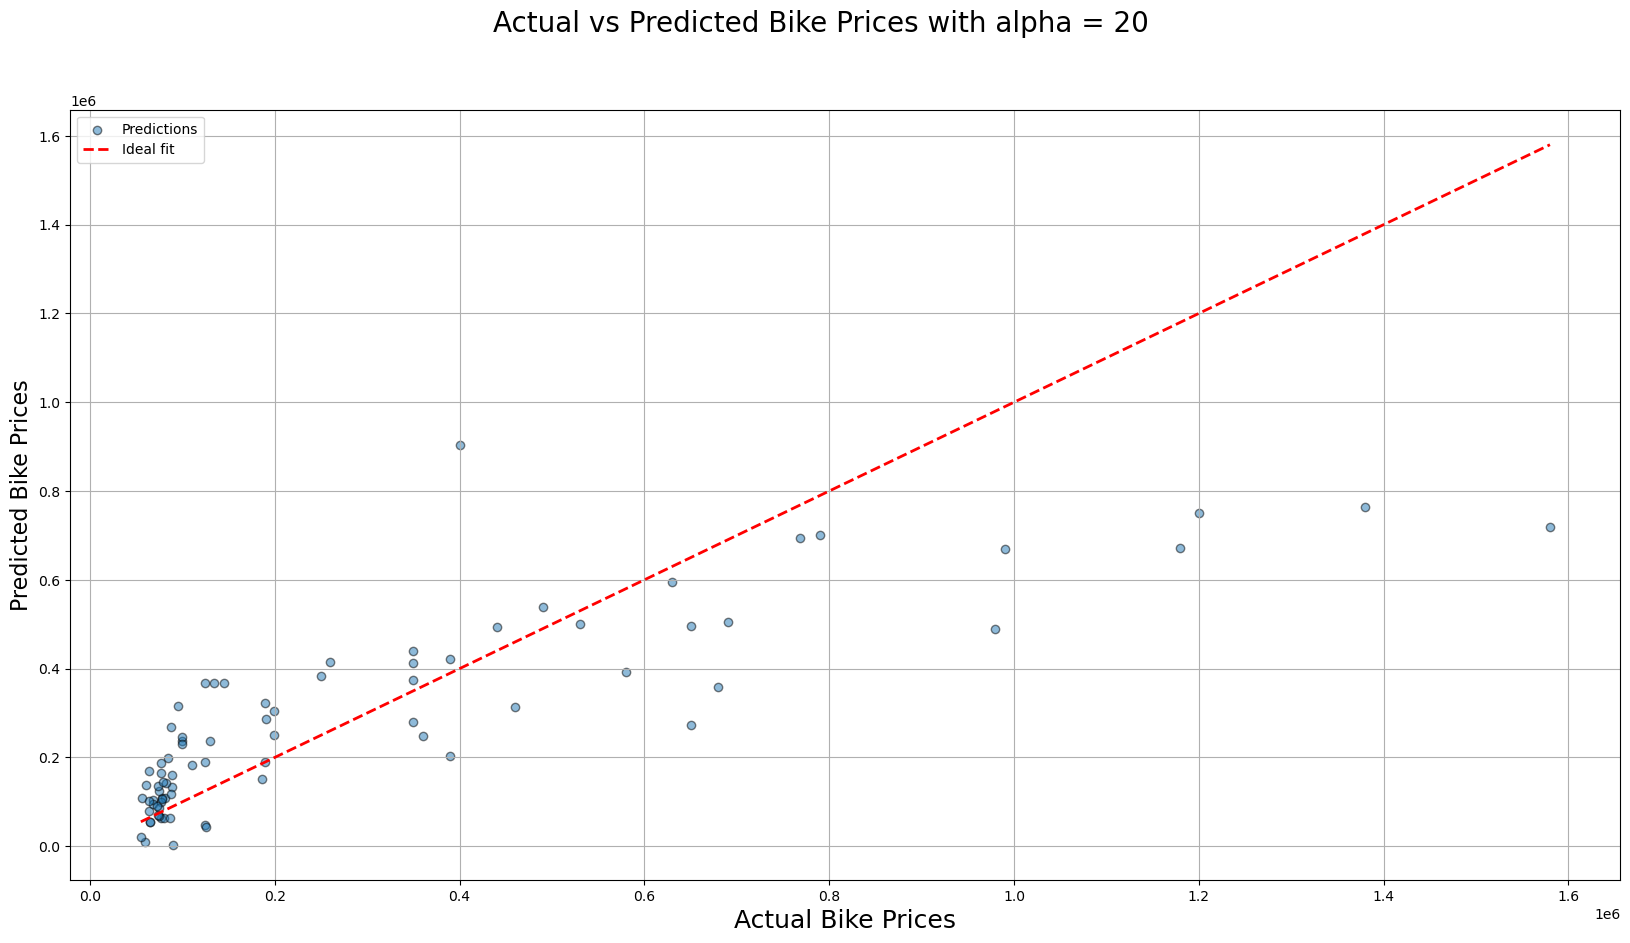

In [51]:
fig = plt.figure(figsize=(20, 10))
plt.scatter(df['Actual'], df['Predictions'], alpha=0.5, edgecolor='k', label='Predictions')
plt.plot([df['Actual'].min(), df['Actual'].max()], [df['Actual'].min(), df['Actual'].max()], 'r--', linewidth=2, label='Ideal fit')
fig.suptitle('Actual vs Predicted Bike Prices with alpha = 20', fontsize=20)  # Plot heading
plt.xlabel('Actual Bike Prices', fontsize=18)                # X-label
plt.ylabel('Predicted Bike Prices', fontsize=16)             # Y-label
plt.legend()
plt.grid(True)
plt.show()

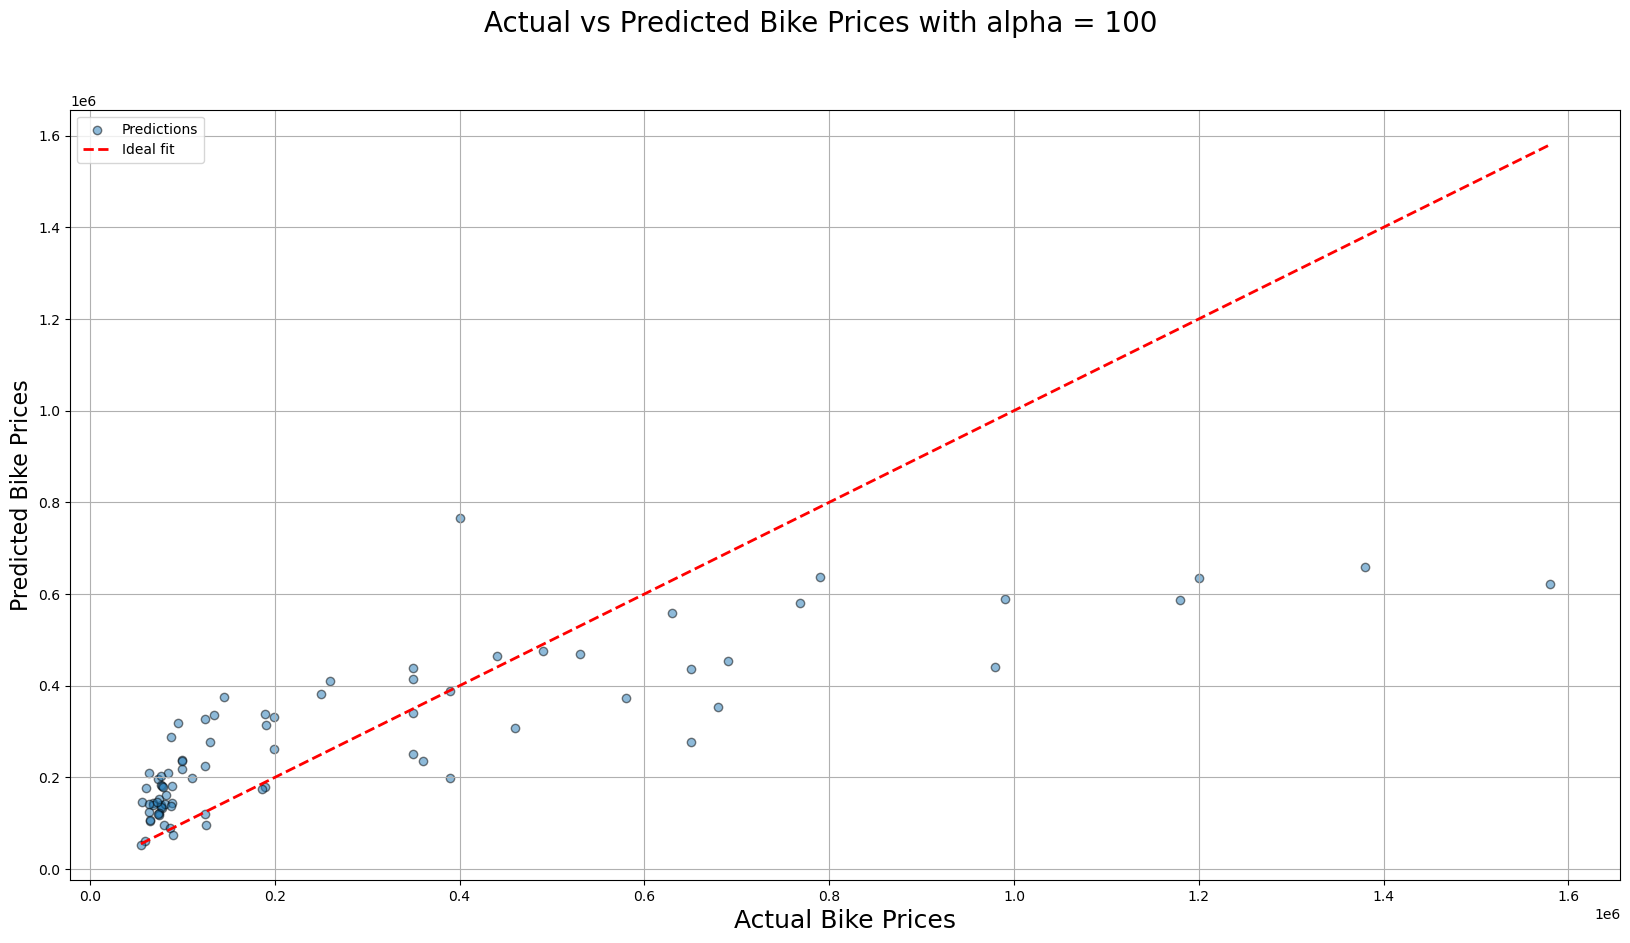

In [52]:
fig = plt.figure(figsize=(20, 10))
plt.scatter(df2['Actual'], df2['Predictions'], alpha=0.5, edgecolor='k', label='Predictions')
plt.plot([df2['Actual'].min(), df2['Actual'].max()], [df2['Actual'].min(), df2['Actual'].max()], 'r--', linewidth=2, label='Ideal fit')
fig.suptitle('Actual vs Predicted Bike Prices with alpha = 100', fontsize=20)  # Plot heading
plt.xlabel('Actual Bike Prices', fontsize=18)                # X-label
plt.ylabel('Predicted Bike Prices', fontsize=16)             # Y-label
plt.legend()
plt.grid(True)
plt.show()